# PyFa Combining to a collection

This example will demonstrate the most common methods for the collection class. This *FaCollection* class, is desingned to combine multiple FaDatasets to one object.

In [1]:
import pyfa_tool as pyfa
print(pyfa.__version__)

0.0.2b


## FaCollection class
The FaCollection class is a class, similar to the FaDataset class, but holds methods for combining multiple FaDatasets on a dimension. Like a FaDataset class, the basis data object is a xarray.Dataset with all the data. This is stored as the `ds` attribute. In addition, a FaCollection holds a list of FaDatasets under the `FaDatasets` attribute.

A typical worklflow consists of:
 - 1: Initiate an empty FaCollection object
 - 2: Add a list of FaDatasets to it.
 - 3: Use one of the FaCollection methods to combine all the FaDatasets to one object (=xarray.Dataset).


In [2]:
#1. initiate an empty FaCollection
my_collection = pyfa.FaCollection()

### Tip: one-liner

On creation of the `FaCollection`, you can already specify step 2 (specifying the `FaDatasets`) and step 3 (selecting a combine method). This means that you can make a 'one-liner' by specifying the `FaCollection()` attributes:

In [3]:
my_collection = pyfa.FaCollection(FaDatasets=[],
                                  combine_by_validate=True)

## Create a list of FaDatasets

There are two ways to do this. First, create a list of FaDataset manually:


In [4]:
fafiles = [pyfa.demo_fa_nwp_1, pyfa.demo_fa_nwp_2] #LBC files for a Belgian NWP experiment
print(fafiles)

dataset_list = [] #Start with an empyt list
for fafile in fafiles:
    dataset=pyfa.FaDataset(fafile=fafile)
    dataset.import_2d_field(fieldname='CLSTEMPERATURE') #import data (can be 2d, 3d or a combination of both)
    dataset_list.append(dataset) #add the FaDataset to the list

# Add the datasets to the collection
my_collection.set_fadatasets(FaDatasets=dataset_list)

['/home/thoverga/Documents/github/PyFa-tool/tests/data/PFAR07csm07+0002', '/home/thoverga/Documents/github/PyFa-tool/tests/data/PFAR07csm07+0003']
[1] "SURFTEMPERATURE  not in whitelist"
[1] "INTSURFGEOPOTENT not in whitelist"
[1] "SURFRESERV.NEIGE not in whitelist"
[1] "SURFRESERV.EAU   not in whitelist"
[1] "PROFTEMPERATURE  not in whitelist"
[1] "PROFRESERV.EAU   not in whitelist"
[1] "SURFTENS.TURB.ZO not in whitelist"
[1] "SURFTENS.TURB.ME not in whitelist"
[1] "SURFACCPLUIE     not in whitelist"
[1] "SURFACCNEIGE     not in whitelist"
[1] "SURFACCGRAUPEL   not in whitelist"
[1] "SURFFLU.RAY.SOLA not in whitelist"
[1] "SURFFLU.RAY.THER not in whitelist"
[1] "SURFRAYT SOLA DE not in whitelist"
[1] "SURFRAYT THER DE not in whitelist"
[1] "SURFRAYT SOL CL  not in whitelist"
[1] "SURFRAYT THER CL not in whitelist"
[1] "CLSTEMPERATURE   reading ..."
[1] "CLSHUMI.RELATIVE not in whitelist"
[1] "CLSVENT.ZONAL    not in whitelist"
[1] "CLSVENT.MERIDIEN not in whitelist"
[1] "SURFNEBUL.TOT

An other method to create the list of Datasets is by using the build in `set_fadatasets_by_file_regex`. This method helps you creating a list of dataset by allowing regex expression (on FA-filenames).

In [5]:
#1. Initiate an empty collection

new_collection = pyfa.FaCollection()

#2. Create a list of Fadatasets (by using the regex method)
#Define the directory where the FA files are stored:
from pathlib import Path
FA_directory=str(Path(pyfa.demo_fa_nwp_1).parent.resolve())
print(f'Directory with (demo) FA files: {FA_directory}')

Filename_regex= 'PFAR*+*' #regex using wildcard character * (UNIX)

new_collection.set_fadatasets_by_file_regex(searchdir=FA_directory,
                                            filename_regex='PFAR*+*', #regex using wildcard character * (UNIX)
                                            #pass import kwargs
                                            whitelist=['CLSTEMPERATURE'],
                                            reproj=True,
                                           )

Directory with (demo) FA files: /home/thoverga/Documents/github/PyFa-tool/tests/data
[1] "SURFTEMPERATURE  not in whitelist"
[1] "INTSURFGEOPOTENT not in whitelist"
[1] "SURFRESERV.NEIGE not in whitelist"
[1] "SURFRESERV.EAU   not in whitelist"
[1] "PROFTEMPERATURE  not in whitelist"
[1] "PROFRESERV.EAU   not in whitelist"
[1] "SURFTENS.TURB.ZO not in whitelist"
[1] "SURFTENS.TURB.ME not in whitelist"
[1] "SURFACCPLUIE     not in whitelist"
[1] "SURFACCNEIGE     not in whitelist"
[1] "SURFACCGRAUPEL   not in whitelist"
[1] "SURFFLU.RAY.SOLA not in whitelist"
[1] "SURFFLU.RAY.THER not in whitelist"
[1] "SURFRAYT SOLA DE not in whitelist"
[1] "SURFRAYT THER DE not in whitelist"
[1] "SURFRAYT SOL CL  not in whitelist"
[1] "SURFRAYT THER CL not in whitelist"
[1] "CLSTEMPERATURE   reading ..."
[1] "CLSHUMI.RELATIVE not in whitelist"
[1] "CLSVENT.ZONAL    not in whitelist"
[1] "CLSVENT.MERIDIEN not in whitelist"
[1] "SURFNEBUL.TOTALE not in whitelist"
[1] "SURFNEBUL.CONVEC not in whitelist"


### Combine by validate

The validate is the datetime instance that the data represents. By combining on validate, we create a dataset with time-evolving variables (2d and 3d). This is done by making use of the `validate` dimension. 


In [6]:
new_collection.combine_by_validate()
print(new_collection)

FaCollection with a combined Dataset: 
 <xarray.Dataset>
Dimensions:         (validate: 2, y: 559, x: 1034, level: 87, basedate: 1)
Coordinates:
  * x               (x) float64 0.1334 0.142 0.1505 0.1591 ... 8.948 8.956 8.965
  * y               (y) float64 53.15 53.14 53.13 53.12 ... 48.4 48.39 48.38
    spatial_ref     (validate) int64 0 0
  * level           (level) int64 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87
  * validate        (validate) datetime64[ns] 2020-08-02T02:00:00 2020-08-02T...
  * basedate        (basedate) datetime64[ns] 2020-08-02
Data variables:
    CLSTEMPERATURE  (validate, y, x) float64 nan nan nan nan ... nan nan nan nan
Attributes: (12/20)
    timestep:     240
    projection:   +proj=lcc +lat_1=50.8 +lat_2=50.8 +lon_0=4.55 +R=6371229
    nx:           844
    ny:           748
    dx:           700
    dy:           700
    ...           ...
    nlev:         87
    refpressure:  101325.0
    A_list:       [0.0000e+00 2.1000e-03 6.6000e-03 1.3000e-02 2.0

We can see that the `validate` dimension now has a lengt of 2, since only 2 FA files fulfilling the regex were found. We can acces the xarray.Dataset as the `ds` attribute:

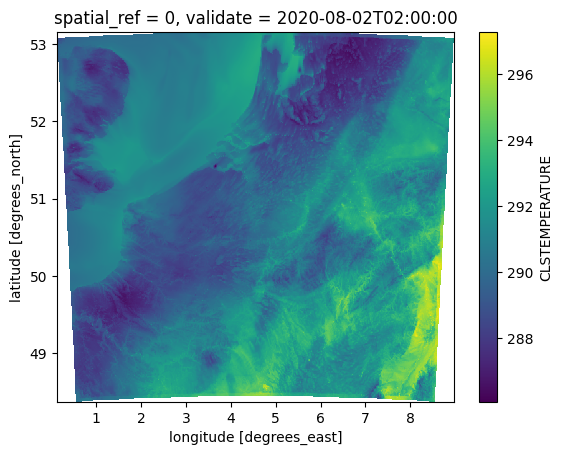

In [7]:
#plotting example
from datetime import datetime
new_collection.ds['CLSTEMPERATURE'].sel(validate=datetime(2020,8,2,2)).plot()

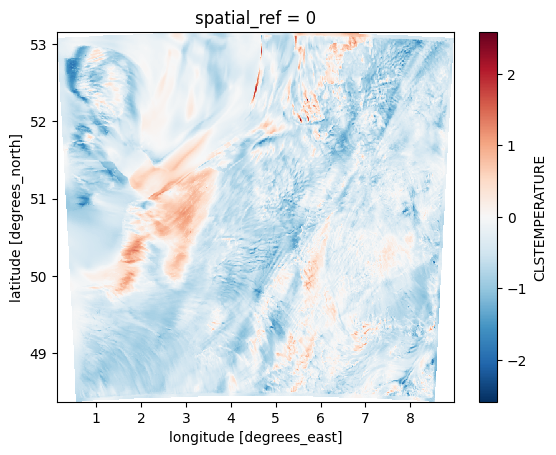

In [8]:
diff = new_collection.ds.sel(validate=datetime(2020,8,2,3)) - new_collection.ds.sel(validate=datetime(2020,8,2,2))
diff['CLSTEMPERATURE'].plot()

## Saving a collection
You can save the Dataset of a FaCollection to a netCDF file, similar as for a FaDataset:

In [9]:
import os
outputfolder = os.getcwd() #specify an output folder

new_collection.save_nc(outputfolder = outputfolder,
                      filename='a_collection_of_fa_files.nc',
                      overwrite=True)

Data saved to /home/thoverga/Documents/github/PyFa-tool/examples/a_collection_of_fa_files.nc
